## 다익스트라 알고리즘

https://m.blog.naver.com/ndb796/221234424646

### 간단한 다익스트라 알고리즘

In [1]:
INF = int(1e9) # 무한을 의미하는 값으로 10억을 설정

# 노드의 개수, 간선의 개수를 입력받기
n, m = map(int, input().split())
# 시작 노드 번호를 입력받기
start = int(input())
# 각 노드에 연결되어 있는 노드에 대한 정보를 담는 리스트를 만들기
graph = [[] for i in range(n + 1)]
# 방문한 적이 있는지 체크하는 목적의 리스트를 만들기
visited = [False] * (n + 1)
# 최단 거리 테이블을 모두 무한으로 초기화
distance = [INF] * (n + 1)

# 모든 간선 정보를 입력받기
for _ in range(m):
    a, b, c = map(int, input().split())
    # a번 노드에서 b번 노드로 가는 비용이 c라는 의미
    graph[a].append((b, c))

# 방문하지 않은 노드 중에서, 가장 최단 거리가 짧은 노드의 번호를 반환
def get_smallest_node():
    min_value = INF
    index = 0 # 가장 최단 거리가 짧은 노드(인덱스)
    for i in range(1, n + 1):
        if distance[i] < min_value and not visited[i]:
            min_value = distance[i]
            index = i
    return index

def dijkstra(start):
    # 시작 노드에 대해서 초기화
    distance[start] = 0
    visited[start] = True
    for j in graph[start]:
        distance[j[0]] = j[1]
    # 시작 노드를 제외한 전체 n - 1개의 노드에 대해 반복
    for i in range(n - 1):
        # 현재 최단 거리가 가장 짧은 노드를 꺼내서, 방문 처리
        now = get_smallest_node()
        visited[now] = True
        # 현재 노드와 연결된 다른 노드를 확인
        for j in graph[now]:
            cost = distance[now] + j[1]
            # 현재 노드를 거쳐서 다른 노드로 이동하는 거리가 더 짧은 경우
            if cost < distance[j[0]]:
                distance[j[0]] = cost

# 다익스트라 알고리즘을 수행
dijkstra(start)

# 모든 노드로 가기 위한 최단 거리를 출력
for i in range(1, n + 1):
    # 도달할 수 없는 경우, 무한(INFINITY)이라고 출력
    if distance[i] == INF:
        print("INFINITY")
    # 도달할 수 있는 경우 거리를 출력
    else:
        print(distance[i])


6 11
1
1 2 2
1 3 5
1 4 1
2 3 3
2 4 2
3 2 3
3 6 5
4 3 3
4 5 1
5 3 1
5 6 2
0
2
3
1
2
4


### 개선된 다익스트라 알고리즘

In [1]:
import heapq
INF = int(1e9) # 무한을 의미하는 값으로 10억을 설정

# 노드의 개수, 간선의 개수를 입력받기
n, m = map(int, input().split())
# 시작 노드 번호를 입력받기
start = int(input())
# 각 노드에 연결되어 있는 노드에 대한 정보를 담는 리스트를 만들기
graph = [[] for i in range(n + 1)]
# 최단 거리 테이블을 모두 무한으로 초기화
distance = [INF] * (n + 1)

# 모든 간선 정보를 입력받기
for _ in range(m):
    a, b, c = map(int, input().split())
    # a번 노드에서 b번 노드로 가는 비용이 c라는 의미
    graph[a].append((b, c))

def dijkstra(start):
    q = []
    # 시작 노드로 가기 위한 최단 경로는 0으로 설정하여, 큐에 삽입
    heapq.heappush(q, (0, start))
    distance[start] = 0
    while q: # 큐가 비어있지 않다면
        # 가장 최단 거리가 짧은 노드에 대한 정보 꺼내기
        dist, now = heapq.heappop(q)
        # 현재 노드가 이미 처리된 적이 있는 노드라면 무시
        if distance[now] < dist:
            continue
        # 현재 노드와 연결된 다른 인접한 노드들을 확인
        for i in graph[now]:
            cost = dist + i[1]
            # 현재 노드를 거쳐서, 다른 노드로 이동하는 거리가 더 짧은 경우
            if cost < distance[i[0]]:
                distance[i[0]] = cost
                heapq.heappush(q, (cost, i[0]))

# 다익스트라 알고리즘을 수행
dijkstra(start)

# 모든 노드로 가기 위한 최단 거리를 출력
for i in range(1, n + 1):
    # 도달할 수 없는 경우, 무한(INFINITY)이라고 출력
    if distance[i] == INF:
        print("INFINITY")
    # 도달할 수 있는 경우 거리를 출력
    else:
        print(distance[i])


6 11
1
1 2 2
1 3 5
1 4 1
2 3 3
2 4 2
3 2 3
3 6 5
4 3 3
4 5 1
5 3 1
5 6 2
0
2
3
1
2
4


### 플로이드 워셜 알고리즘

In [2]:
INF = int(1e9) # 무한을 의미하는 값으로 10억을 설정

# 노드의 개수 및 간선의 개수를 입력받기
n = int(input())
m = int(input())
# 2차원 리스트(그래프 표현)를 만들고, 모든 값을 무한으로 초기화
graph = [[INF] * (n + 1) for _ in range(n + 1)]

# 자기 자신에서 자기 자신으로 가는 비용은 0으로 초기화
for a in range(1, n + 1):
    for b in range(1, n + 1):
        if a == b:
            graph[a][b] = 0

# 각 간선에 대한 정보를 입력 받아, 그 값으로 초기화
for _ in range(m):
    # A에서 B로 가는 비용은 C라고 설정
    a, b, c = map(int, input().split())
    graph[a][b] = c

# 점화식에 따라 플로이드 워셜 알고리즘을 수행
for k in range(1, n + 1):
    for a in range(1, n + 1):
        for b in range(1, n + 1):
            graph[a][b] = min(graph[a][b], graph[a][k] + graph[k][b])

# 수행된 결과를 출력
for a in range(1, n + 1):
    for b in range(1, n + 1):
        # 도달할 수 없는 경우, 무한(INFINITY)이라고 출력
        if graph[a][b] == 1e9:
            print("INFINITY", end=" ")
        # 도달할 수 있는 경우 거리를 출력
        else:
            print(graph[a][b], end=" ")
    print()


4
7
1 2 4
1 4 6
2 1 3
2 3 7
3 1 5
3 4 4
4 3 2
0 4 8 6 
3 0 7 9 
5 9 0 4 
7 11 2 0 


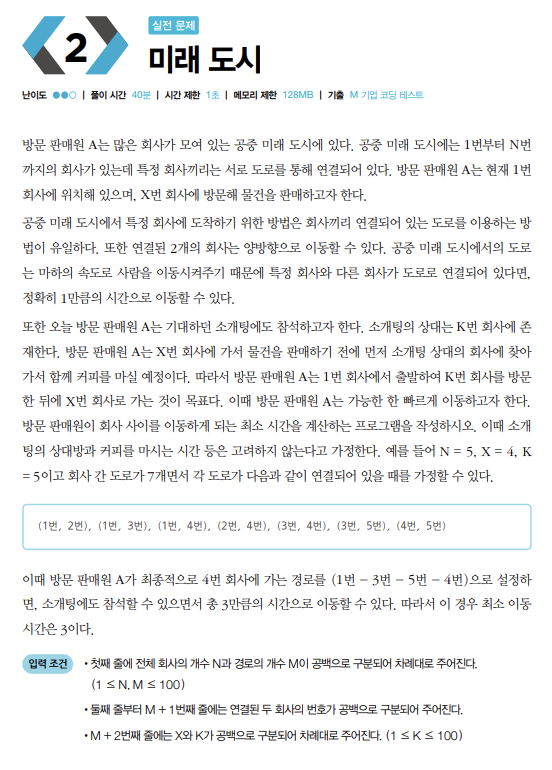

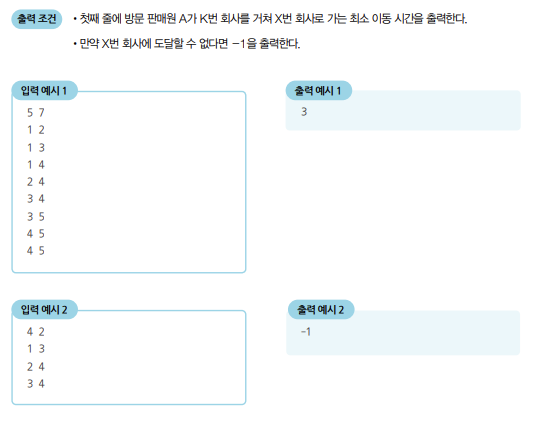

In [3]:
INF = int(1e9) # 무한을 의미하는 값으로 10억을 설정

# 노드의 개수 및 간선의 개수를 입력받기
n, m = map(int, input().split())
# 2차원 리스트(그래프 표현)를 만들고, 모든 값을 무한으로 초기화
graph = [[INF] * (n + 1) for _ in range(n + 1)]

# 자기 자신에서 자기 자신으로 가는 비용은 0으로 초기화
for a in range(1, n + 1):
    for b in range(1, n + 1):
        if a == b:
            graph[a][b] = 0

# 각 간선에 대한 정보를 입력 받아, 그 값으로 초기화
for _ in range(m):
    # A와 B가 서로에게 가는 비용은 1이라고 설정
    a, b = map(int, input().split())
    graph[a][b] = 1
    graph[b][a] = 1

# 거쳐 갈 노드 X와 최종 목적지 노드 K를 입력받기
x, k = map(int, input().split())

# 점화식에 따라 플로이드 워셜 알고리즘을 수행
for k in range(1, n + 1):
    for a in range(1, n + 1):
        for b in range(1, n + 1):
            graph[a][b] = min(graph[a][b], graph[a][k] + graph[k][b])

# 수행된 결과를 출력
distance = graph[1][k] + graph[k][x]

# 도달할 수 없는 경우, -1을 출력
if distance >= 1e9:
    print("-1")
# 도달할 수 있다면, 최단 거리를 출력
else:
    print(distance)


4 2
1 3
2 4
3 4
-1


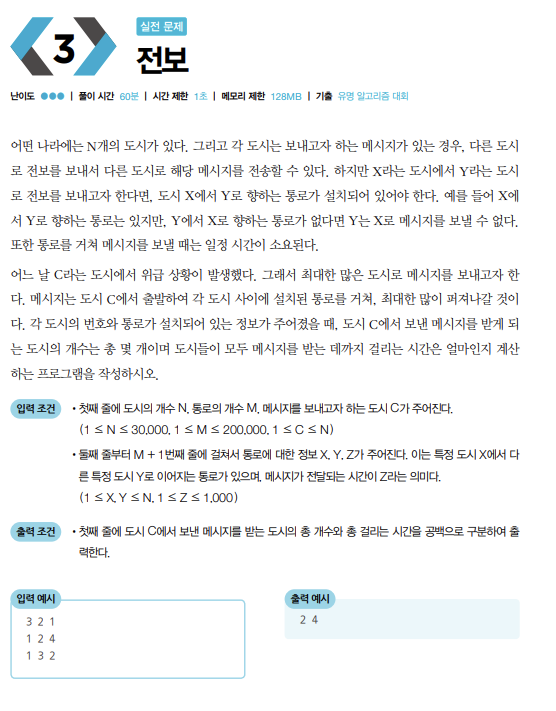

In [1]:
import heapq
INF = int(1e9) # 무한을 의미하는 값으로 10억을 설정

# 노드의 개수, 간선의 개수, 시작 노드를 입력받기
n, m, start = map(int, input().split())
# 각 노드에 연결되어 있는 노드에 대한 정보를 담는 리스트를 만들기
graph = [[] for i in range(n + 1)]
# 최단 거리 테이블을 모두 무한으로 초기화
distance = [INF] * (n + 1)

# 모든 간선 정보를 입력받기
for _ in range(m):
    x, y, z = map(int, input().split())
    # X번 노드에서 Y번 노드로 가는 비용이 Z라는 의미
    graph[x].append((y, z))

def dijkstra(start):
   q = []
   # 시작 노드로 가기 위한 최단 경로는 0으로 설정하여, 큐에 삽입
   heapq.heappush(q, (0, start))
   distance[start] = 0
   while q: # 큐가 비어있지 않다면
        # 가장 최단 거리가 짧은 노드에 대한 정보를 꺼내기
        dist, now = heapq.heappop(q)
        if distance[now] < dist:
            continue
        # 현재 노드와 연결된 다른 인접한 노드들을 확인
        for i in graph[now]:
            cost = dist + i[1]
            # 현재 노드를 거쳐서, 다른 노드로 이동하는 거리가 더 짧은 경우
            if cost < distance[i[0]]:
                distance[i[0]] = cost
                heapq.heappush(q, (cost, i[0]))

# 다익스트라 알고리즘을 수행
dijkstra(start)

# 도달할 수 있는 노드의 개수
count = 0
# 도달할 수 있는 노드 중에서, 가장 멀리 있는 노드와의 최단 거리
max_distance = 0
for d in distance:
    # 도달할 수 있는 노드인 경우
    if d != 1e9:
        count += 1
        max_distance = max(max_distance, d)

# 시작 노드는 제외해야 하므로 count - 1을 출력
print(count - 1, max_distance)


3 2 1
1 2 4
1 3 2
2 4
